# Capítulo 2. Autómatas Celulares.
> Autor: Natalia Cely Callejas, Ronald Chavez.\
> Universidad Nacional de Colombia  
> Abril 25, 2025

## Introducción
Los Autómatas Celulares (AC) son modelos matemáticos y computacionales utilizados para describir el comportamiento de cada uno de los elementos (células) que constituyen un sistema complejo, en donde los elementos se ven influenciados por otros elementos y crean relaciones que siguen reglas locales y simples. Pueden ser de 1, 2 o más dimensiones, siendo los primeros los más utilizados y se rigen por el concepto de vecindad, que indica que cada célula del sistema presenta un comprotamiento resultado de los comportamientos de sus células vecinas y su propio comportamiento. Este modelo permite un acercamiento a sistemas complejos con estados eumerables y dinámicos en el tiempo.

## Reglas básicas en la casa, la universidad y en el transporte (transmilenio) 

En la casa: 
 - Si hora es 7:00-8:00 AM y energía < 50% ⇒ estado = Preparándose. 
 - Si ya desayuné y tengo tareas ⇒ estado = Estudiando. 
 - Si no hay tareas y energía baja ⇒ estado = Dormido. 
 - Si es hora de almuerzo y hambre > 70% ⇒ estado = Comiendo. 
 - Si es tarde (después de 10 PM) y energía < 40% ⇒ estado = Dormido. 

En la universidad: 
 - Si hora coincide con clase programada ⇒ estado = Asistiendo clase. 
 - Si no hay clase y amigos cerca ⇒ estado = Socializando. 
 - Si estoy solo y tengo tareas ⇒ estado = Estudiando. 
 - Si clase termina y próxima es en menos de 30 min ⇒ estado = Esperando. 
 - Si hay que cambiar de aula ⇒ estado = Caminando. 

En el transporte: 
 - Si hay puesto libre ⇒ estado = Sentado. 
 - Si no hay puesto y bus lleno ⇒ estado = De pie. 
 - Si estoy de pie y aburrido ⇒ estado = Viendo celular o Pensando. 
 - Si llevo audífonos ⇒ estado = Escuchando música. 
 - Si el viaje es largo y estoy cansado ⇒ intento Sentarme o Dormitar. 
## Modelo de difusión con ACs probabilísticos
*Modelo:* Epidemia SIR (Susceptible-Infectado-Recuperado)
*Estados:*
    S: Susceptible → representado por 0
    I: Infectado → representado por 1
    R: Recuperado → representado por 2

*Reglas:*
- Un S con vecinos infectados puede contagiarse con probabilidad p_infect.
- Un I puede recuperarse con probabilidad p_recover.

C:\Users\ncely\AppData\Local\Temp\ipykernel_860\2238220924.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  mat = ax.matshow(grid, cmap=plt.cm.get_cmap('viridis', 3))


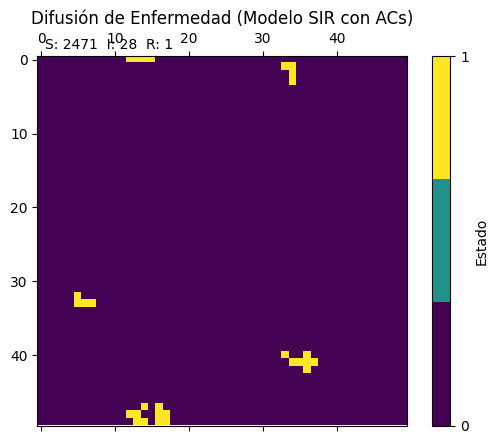

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros del modelo
GRID_SIZE = 50
p_infect = 0.3     # Probabilidad de infección
p_recover = 0.1    # Probabilidad de recuperación
initial_infected = 5

# Estados: 0=S, 1=I, 2=R
S, I, R = 0, 1, 2

# Inicializar la rejilla
grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

# Infectar algunas celdas al azar
for _ in range(initial_infected):
    x, y = np.random.randint(0, GRID_SIZE, 2)
    grid[x, y] = I

# Función para obtener vecinos
def get_neighbors(x, y):
    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = (x + dx) % GRID_SIZE, (y + dy) % GRID_SIZE
            neighbors.append((nx, ny))
    return neighbors

# Paso de simulación
def update(frame):
    global grid
    new_grid = grid.copy()
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x, y] == S:
                neighbors = get_neighbors(x, y)
                if any(grid[nx, ny] == I for nx, ny in neighbors):
                    if np.random.rand() < p_infect:
                        new_grid[x, y] = I
            elif grid[x, y] == I:
                if np.random.rand() < p_recover:
                    new_grid[x, y] = R
    grid = new_grid
    mat.set_data(grid)
    return [mat]

# ... El resto del código queda igual ...

# Configurar visualización
fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap=plt.cm.get_cmap('viridis', 3))
plt.colorbar(mat, ticks=[0, 1, 2], label="Estado")

# Agregar texto de estadísticas
text = ax.text(0.02, 1.02, '', transform=ax.transAxes, color='black', fontsize=10)

plt.title("Difusión de Enfermedad (Modelo SIR con ACs)")

# Paso de simulación
def update(frame):
    global grid
    new_grid = grid.copy()
    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x, y] == S:
                neighbors = get_neighbors(x, y)
                if any(grid[nx, ny] == I for nx, ny in neighbors):
                    if np.random.rand() < p_infect:
                        new_grid[x, y] = I
            elif grid[x, y] == I:
                if np.random.rand() < p_recover:
                    new_grid[x, y] = R
    grid = new_grid
    mat.set_data(grid)
    
    # Conteo de estados
    s_count = np.sum(grid == S)
    i_count = np.sum(grid == I)
    r_count = np.sum(grid == R)

    # Actualizar texto
    text.set_text(f'S: {s_count}  I: {i_count}  R: {r_count}')

    return [mat, text]

# Animación
ani = animation.FuncAnimation(fig, update, frames=100, interval=200, blit=True, repeat=False)

plt.show()
ani.save('simulacion.gif', writer='pillow')


## Diagramas de Voronoi
Para realizar un análisis demográfico por medio de los diagramas de Voronoi se tomo como sujeto de la muestra la ciudad de Ibagué, capital del departamento Tolima. Considerada una ciudad pequeña, cuenta con una extensión territorial de $1.394,3 \ km^2$ y una población (2025) de 577.527 personas, lo que resulta en una densidad poblacional de $414,2 \ personas/km^2$, considerablemente mayor que la del departamento Tolima en total. Así, su población se distribuye con un comportamiento resumida en la siguiente imagen:

![Distribución poblacional de Ibagué, Tolima](Multimedia/Distribucionpoblacional-ibague.png)

Se puede observar que la mayoría de la poblción se encuentra en edades infantiles, jóvenes y productivas, por lo que el entretenimiento es uno de los servicios que pueden tener mejor recibimiento por parte de los habitantes de la ciudad mencionada. Es por esto, que se definió realizar el análisis de oferta de Cines en la ciudad, por medio de diagramas de Voronoi que puedan reflejar las áreas más cercanas a cada uno de los puntos actuales.

![Diagrama de Voronoisobre mapa](Multimedia/voronoi-map.png)

O de forma simplificada (sin la imagen base, para mejorar su lectura):

![Diagrama de Voronoi](Multimedia/voronoi.png)

Los resultados indican una teselación altamente irregular, con concentración de los puntos en la parte superior izquierda y superior central del mapa, dejando de lado comunas como la 7 que contiene el barrio El Salado, con una de las mayores densidades poblacionales de la ciudad, lo que indica una falta de oferta en comercios relacionados con el cine en varios sectores de la ciudad.

## Aporte de las herramientas LLM
Se usó la herramienta LLM para convertir conceptos complejos en pasos claros: estados, reglas, visualización. También actúo como puente entre teoría (epidemias, autómatas) y práctica (código en Python) ayudándome a resolver algunos errores que estaba generando el código.

Además de la redacción, se utilizó la herramienta LLM ChatGPT para identificar enlaces y sitios web útiles para encontrar la información y los datos verídicos de la ciudad ejemplo en el punto 3. Además de enumerar opciones de herramientas para la ilustración del diagrama y una guía general de los pasos a seguir para su trazo.

## Conclusiones

El programa desarrollado simula la propagación de una enfermedad en una población usando un modelo basado en autómatas celulares probabilísticos del tipo SIR (Susceptible-Infectado-Recuperado). A través de reglas locales y simples, como la probabilidad de contagio y de recuperación, se logra modelar un fenómeno complejo como lo es una epidemia, permitiendo observar cómo la enfermedad se expande, alcanza un pico y eventualmente disminuye conforme las personas se recuperan. Gracias a la visualización en tiempo real, es posible analizar patrones como:
 - Zonas de alto contagio
 - Velocidad de propagación
 - Efectos de modificar parámetros como la tasa de infección o recuperación.

Este modelo ofrece una aproximación sencilla pero poderosa para entender dinámicas de contagio en sistemas complejos. Aunque es simplificado, sienta las bases para modelos más avanzados que incluyan mortalidad, vacunación, movilidad o heterogeneidad poblacional.

Los diagramas de Voronoi pueden ser en sí mismos una herramienta para actividades externas al desarrollo tecnológico, como la decisión de dónde ubicar un nuevo negocio, o como asesoría para políticas públicas, entre otros, ya que permiten trazar de manera visual el comportamiento de espacios en una ciudad y resaltan irregularidades, fenómenos como supoblación o sobrepoblación sobre las que se pueden tomar medidas. Adicionalmente, la posibilidad de realizar un análisis más completo a través del tiempo puede resaltar fenómenos como cuáles negocios se matienen, cuáles migran o se cierran, comportamientos analizables desde el enfoque de los autómatas celulares, y guiar a las personas a ubicar sus negocios no solo en lugares que se mantengan a través del tiempo sino que además suplan las necesidades de la sociedad circundante.

## Bibliografía
- City-Facts Colombia. Datos poblacionales de Ibagué. City Facts. Recuperado de: [CityFacts](https://es.city-facts.com/ibagu%C3%A9/population)